# cluster analysis in python

## unsupervised learning - basics

* what is a cluster?
    * a group of items with similar characteristics

* hierarchical clustering
* k means clustering
* other clustering - DBSCAN, Gaussian methods

* hierarchical clustering
    * each point is a cluster
    * centre point mean is calculated
    * nearest points merged, etc.


Inconsistency statistics:
 [[0.0376467  0.         1.         0.        ]
 [0.11030352 0.         1.         0.        ]
 [0.17058938 0.         1.         0.        ]
 [0.26616347 0.         1.         0.        ]
 [0.24960014 0.19699518 2.         0.70710678]
 [0.24767369 0.20141959 3.         0.95093627]
 [0.35733831 0.26410286 2.         0.70710678]
 [0.39812403 0.31816011 6.         1.67501353]
 [0.46422062 0.41006894 9.         2.01385764]]


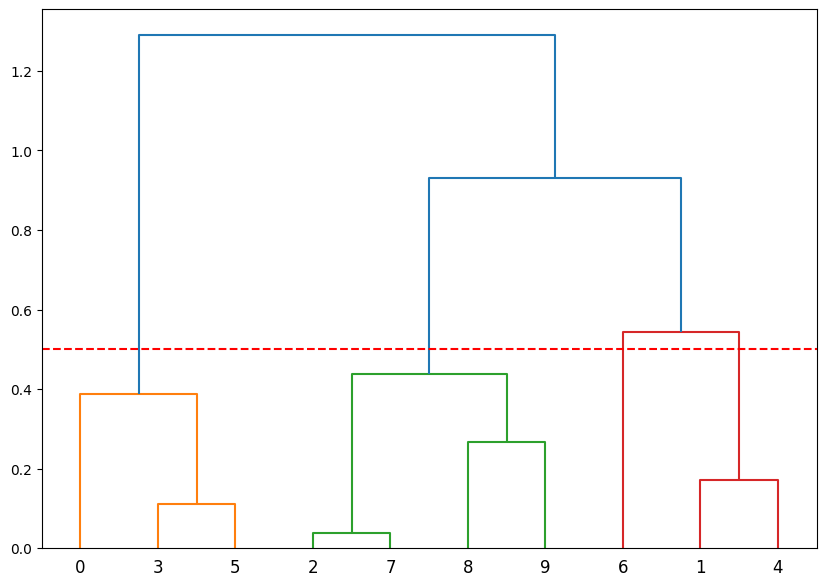

Cluster assignments: [1 3 2 1 3 1 4 2 2 2]


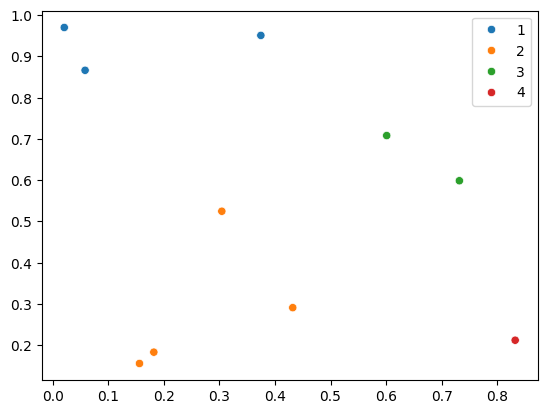

In [30]:
import numpy as np
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram, inconsistent
import matplotlib.pyplot as plt
import seaborn as sns

# Generate sample data
np.random.seed(42)
data = np.random.rand(10, 2)  # 10 points in 2D

# Perform hierarchical clustering
Z = linkage(data, method='ward')

# Calculate inconsistency statistics
depth = 5  # depth of the inconsistency calculation
incons = inconsistent(Z, depth)

# Print inconsistency statistics
print("Inconsistency statistics:\n", incons)

# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.axhline(y=0.5, color='r', linestyle='--')  # Example threshold
plt.show()

# scatter plot
sns.scatterplot(x=data[:, 0], y=data[:, 1], hue=clusters, palette='tab10')


# Form flat clusters using max_d
max_d = 0.5  # maximum distance for clusters
clusters = fcluster(Z, max_d, criterion='distance')

# Print cluster assignments
print("Cluster assignments:", clusters)


### kmeans clustering

* random cluster centre generated
* distance computed and points assigned
* cluster centre recomputed




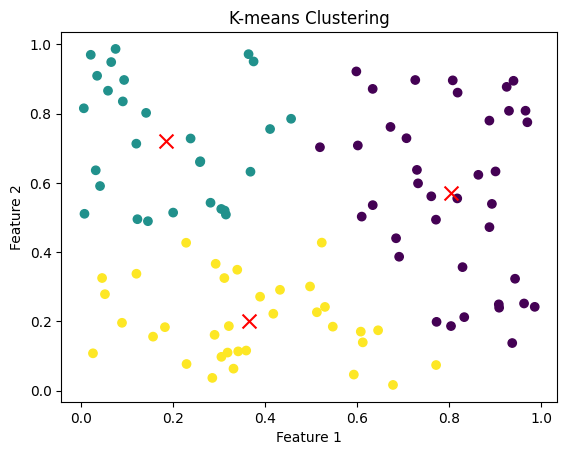

Cluster centroids:
 [[0.8039633  0.57026999]
 [0.18520943 0.72228065]
 [0.36376248 0.20008043]]
Distortion: 0.21963584400577185


In [31]:
import numpy as np
from scipy.cluster.vq import kmeans, vq
import matplotlib.pyplot as plt

# Generate sample data
np.random.seed(42)
data = np.random.rand(100, 2)  # 100 points in 2D

# Perform K-means clustering
num_clusters = 3
centroids, distortion = kmeans(data, num_clusters)

# Assign each sample to a cluster
cluster_labels, _ = vq(data, centroids)

# Plot the data points and centroids
plt.scatter(data[:, 0], data[:, 1], c=cluster_labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=100, c='red')
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Print cluster centroids and distortion
print("Cluster centroids:\n", centroids)
print("Distortion:", distortion)

### prepping data for clustering

* scales, variances might differ - need to normalise to rescale to standard dev of 1
* x_new = x / std_dev(x)

`whiten`

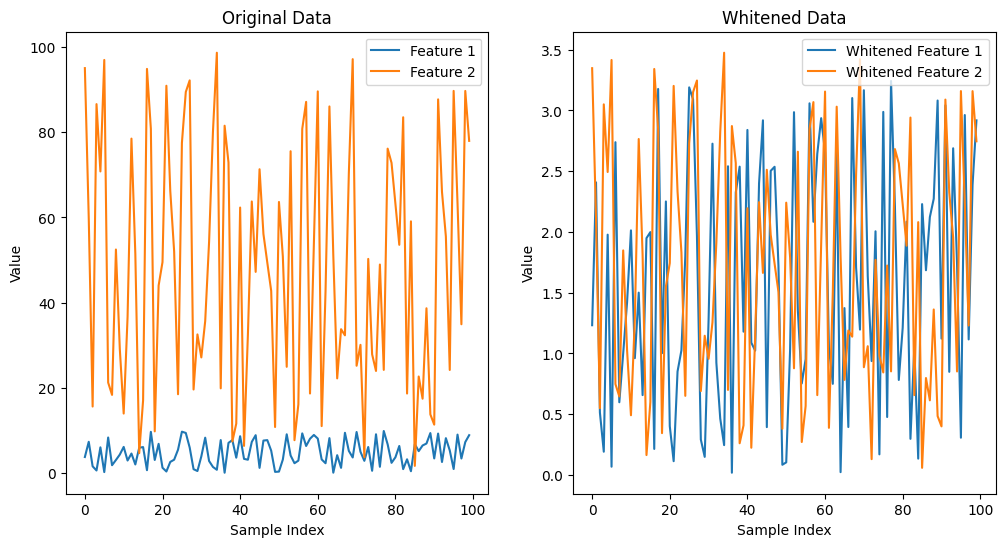

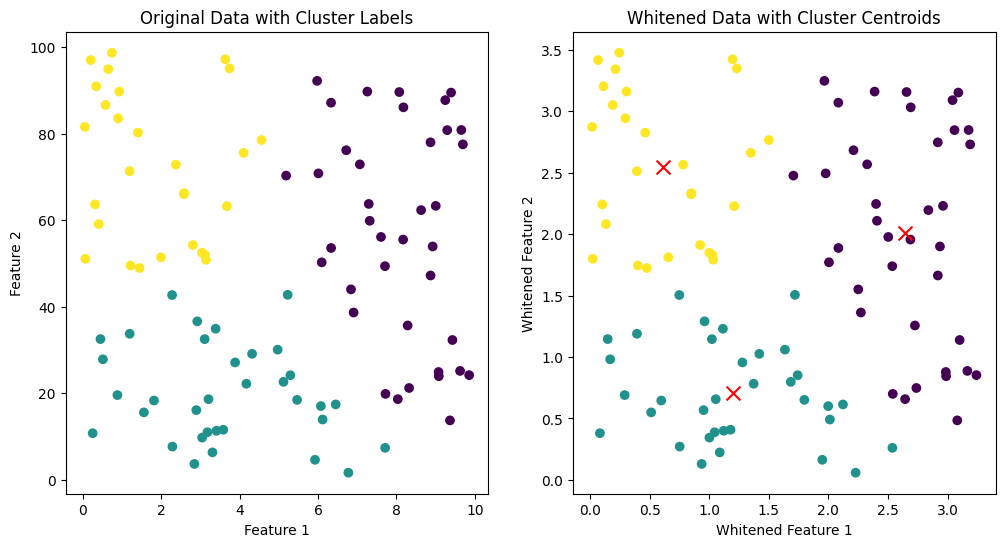

Original data:
 [[ 3.74540119 95.07143064]
 [ 7.31993942 59.86584842]
 [ 1.5601864  15.59945203]
 [ 0.58083612 86.61761458]
 [ 6.01115012 70.80725778]]
Whitened data:
 [[1.23220802 3.34783518]
 [2.40820345 2.10810957]
 [0.51328926 0.54931743]
 [0.19109059 3.0501434 ]
 [1.97762189 2.49339919]]


In [34]:
import numpy as np
from scipy.cluster.vq import whiten, kmeans, vq
import matplotlib.pyplot as plt

# Generate sample data
np.random.seed(42)
data = np.random.rand(100, 2) * [10, 100]  # 100 points in 2D with different scales

# Whiten the data
whitened_data = whiten(data)

# Perform K-means clustering on whitened data
num_clusters = 3
centroids, distortion = kmeans(whitened_data, num_clusters)

# Assign each sample to a cluster
cluster_labels, _ = vq(whitened_data, centroids)

# Plot the original data as line graph
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(data[:, 0], label='Feature 1')
plt.plot(data[:, 1], label='Feature 2')
plt.title('Original Data')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()

# Plot the whitened data as line graph
plt.subplot(1, 2, 2)
plt.plot(whitened_data[:, 0], label='Whitened Feature 1')
plt.plot(whitened_data[:, 1], label='Whitened Feature 2')
plt.title('Whitened Data')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()

plt.show()

# Plot the data points and centroids
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(data[:, 0], data[:, 1], c=cluster_labels, cmap='viridis')
plt.title('Original Data with Cluster Labels')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.subplot(1, 2, 2)
plt.scatter(whitened_data[:, 0], whitened_data[:, 1], c=cluster_labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=100, c='red')
plt.title('Whitened Data with Cluster Centroids')
plt.xlabel('Whitened Feature 1')
plt.ylabel('Whitened Feature 2')

plt.show()

# Print original and whitened data
print("Original data:\n", data[:5])  # Print first 5 rows
print("Whitened data:\n", whitened_data[:5])  # Print first 5 rows